In [ ]:
##importation des bibliothèques
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Setup de base : solution analytique et réseau de neurones

In [ ]:
##écriture de la solution analytique pour n = 1
def exact_solution(x):
  y = np.sin(x)/x
  return y

In [ ]:
##écriture de la solution approchée pour n = 3 (la dénomination exact_solution comme nom de la fonction n'est donc pas approprié puisque c'est une solution approchée)
def exact_solution(x): #à noter qu'ici il s'agit davantage d'une solution approchée
  y = 2/(np.exp(x/(np.sqrt(3))) + np.exp(-x/(np.sqrt(3))))
  return y

In [ ]:
##écriture de la solution analytique pour n = 5
def exact_solution(x):
  y = 1/(pow(1+ (x**2)*1/3, 1/2))
  return y

In [ ]:


##création du réseau de neurones
class FCN(nn.Module):
    "Defines a standard fully-connected network in PyTorch"

    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, x1):
      x1 = self.fcs(x1)
      x1 = self.fch(x1)
      x1 = self.fce(x1)
      return x1

Etape 1 :Entraînement des PINNS pour troouver solution de l'équation diff

In [ ]:
## A coder => c'est la même chose que programme qu'on fait depuis le début

Etape 2 : entraînement des PINNS pour trouver n




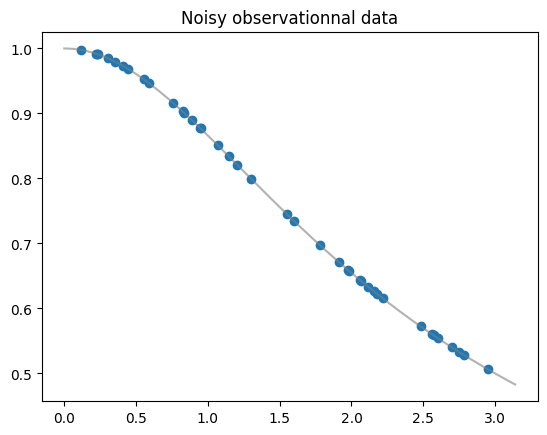

In [ ]:
##création des données observationnelles en bruitant les solutions exacte
torch.manual_seed(123)

#données expérimentales générées aléatoirement
x_obs = 3*torch.rand(40).view(-1,1) #il y avait torch.rand(40).view(-1,1) avant mais pose pb car tenseur x_obs a pas autant d'élément que x_physics sinon
y_obs = exact_solution(x_obs) + 0.00*torch.randn_like(x_obs) #au début : 0.04*torch.randn_like(x_obs)

#données expérimentales générées de manière uniforme
#x_obs = torch.linspace(0,1, 40).view(-1,1)
#y_obs = exact_solution(x_obs) + 0.01*torch.randn_like(x_obs)
#données associées à la solution analytique
x_test = torch.linspace(0, 3.14, 300).view(-1,1) #sans ça x_test ne serait pas défini#avant javais torch.linspace(0, 1, 300)
#y_exact = exact_solution(x_test)

plt.figure()
plt.title("Noisy observationnal data")
plt.scatter(x_obs[:,0], y_obs[:,0])#plt.scatter = plt.plot(x_obs, y_obs, 'x')
"je sais pas pourquoi à la ligne du dessous il me dit que x_exact est pas def alors qu'il l'est pour programme de Moseley"
x_test, y_exact = torch.linspace(0,3.14,300).view(-1, 1), exact_solution(x_test) #torch.linspace(0,1,300)
plt.plot(x_test[:,0], y_exact[:,0], label="Exact solution", color="tab:grey", alpha=0.6)
plt.show()

In [ ]:
print(y_exact)

tensor([[1.0000],
        [1.0000],
        [0.9999],
        [0.9998],
        [0.9997],
        [0.9995],
        [0.9993],
        [0.9991],
        [0.9988],
        [0.9985],
        [0.9982],
        [0.9978],
        [0.9974],
        [0.9969],
        [0.9964],
        [0.9959],
        [0.9953],
        [0.9947],
        [0.9941],
        [0.9934],
        [0.9927],
        [0.9920],
        [0.9912],
        [0.9904],
        [0.9896],
        [0.9887],
        [0.9878],
        [0.9869],
        [0.9859],
        [0.9849],
        [0.9839],
        [0.9828],
        [0.9817],
        [0.9806],
        [0.9794],
        [0.9782],
        [0.9770],
        [0.9757],
        [0.9745],
        [0.9732],
        [0.9718],
        [0.9705],
        [0.9691],
        [0.9677],
        [0.9662],
        [0.9647],
        [0.9632],
        [0.9617],
        [0.9602],
        [0.9586],
        [0.9570],
        [0.9554],
        [0.9537],
        [0.9521],
        [0.9504],
        [0

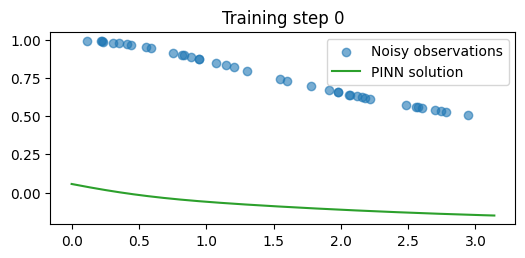

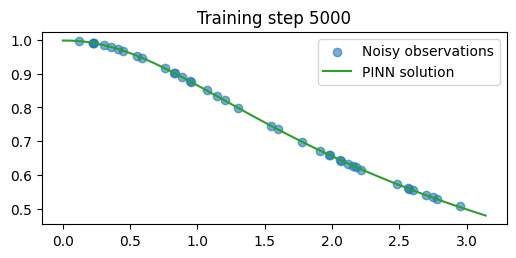

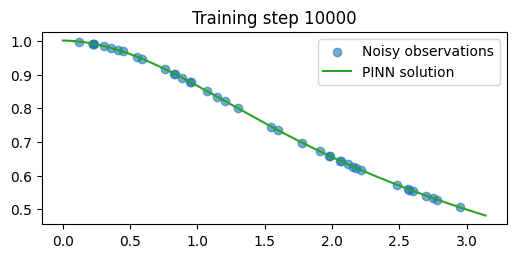

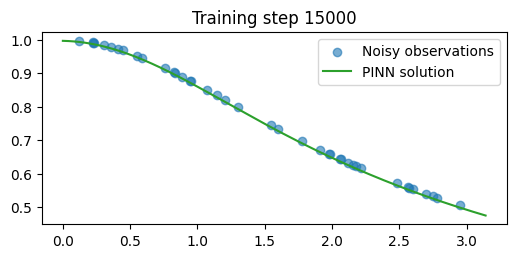

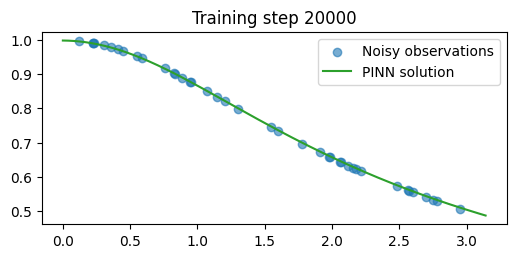

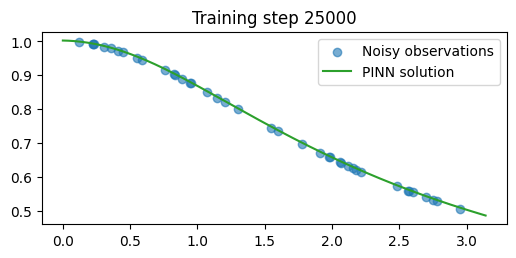

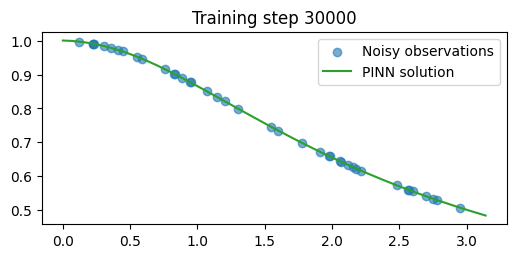

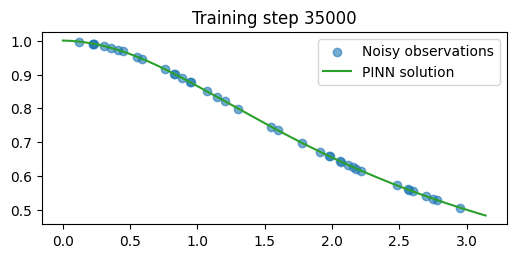

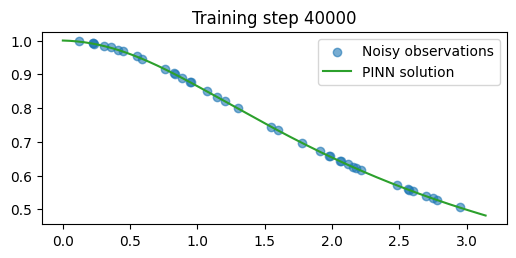

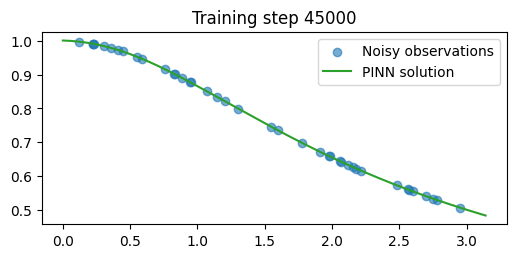

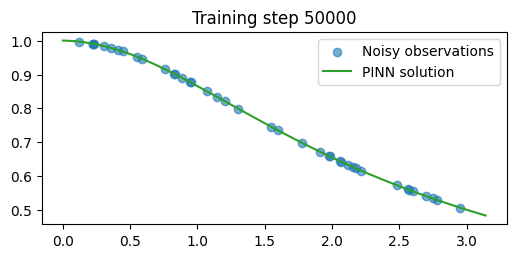

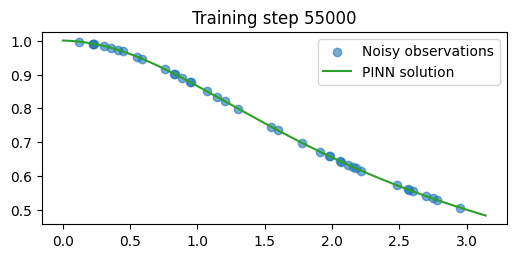

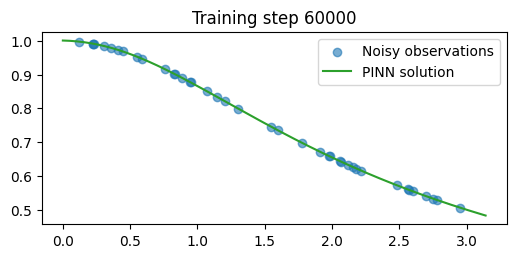

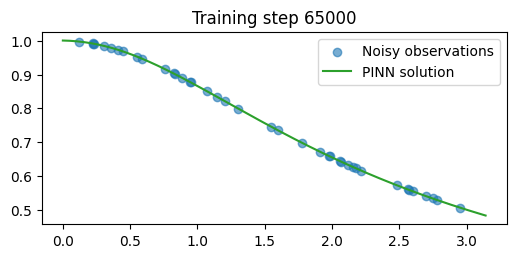

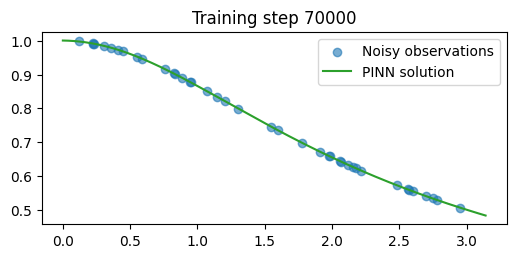

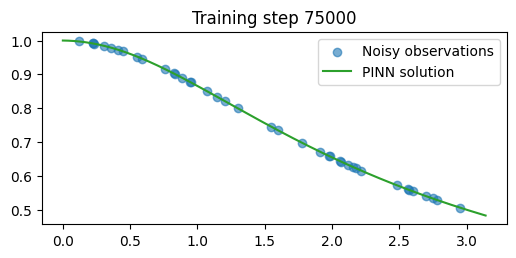

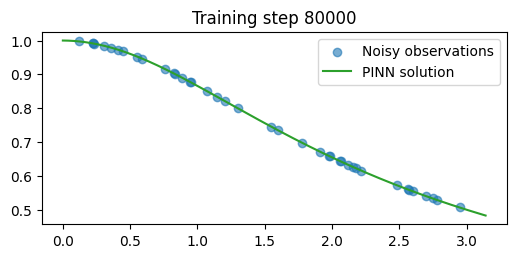

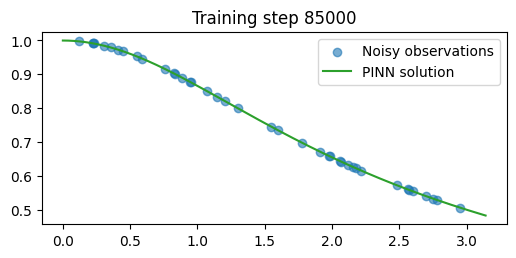

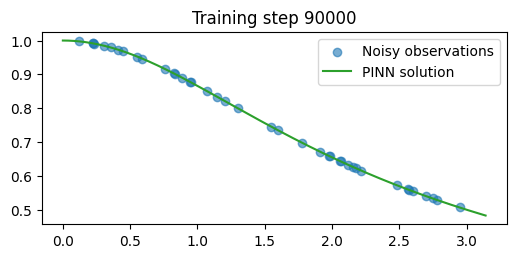

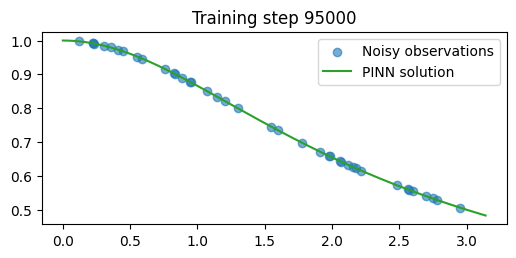

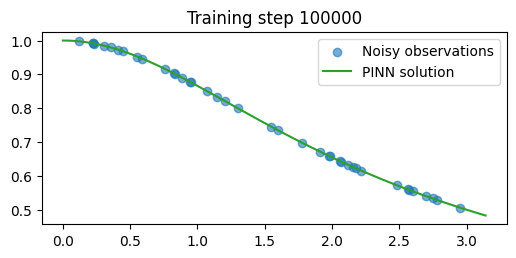

In [ ]:
torch.manual_seed(123)
#réseau de neuronnes à entraîner
pinn = FCN(1,1,32,3)

#définition des points d'entraînement sur tout le domaine pour la loss physique
x_physics = torch.linspace(0,3.14,30).view(-1,1).requires_grad_ (True) #avant j'avais torch.linspace(0,1,30)

#entraînement des PINNS => jsp quoi mettre
"à l'aide"

#n est considére commme un paramètre à apprendre
n = torch.nn.Parameter(torch.zeros(1, requires_grad= True))
ns = []

#ajout de mu à l'optimiseur
optimiser = torch.optim.Adam(list(pinn.parameters())+ [n], lr = 1e-3)
for i in range(100001): #au début range(15001)
  optimiser.zero_grad() #initialisation de la valeur de l'optimiseur
  #definition de l'hyperparamètre lambda (poids qu'aura la loss2 => la loss des donneés)
  lambda1 = 1e4

  #calcul de la loss physique (loss1)
  "peut-être un problème ici avec définition des dérivées 1ère et secondes"
  y = pinn(x_physics)
  dydx = torch.autograd.grad(y, x_physics, torch.ones_like(y), create_graph=True)[0] #dérivée première de l'ED
  d2ydx2 = torch.autograd.grad(dydx, x_physics, torch.ones_like(dydx), create_graph=True)[0] #dérivée seconde de l'ED
  loss1 = torch.mean((x_physics*d2ydx2 + 2*dydx + x_physics*abs(y)**n)**2) #avant il n'y avait pas de valeur absolue

  #calcul de la data loss (loss2)
  "le problème est ici je pense"
  y = pinn(x_obs)
  loss2 = torch.mean((y - y_obs)**2)

  #expression de la loss total et recalcul de cette dernière pour la minimiser
  loss = loss1 + lambda1*loss2 #à la base : loss = loss1 + lambda1*loss2
  loss.backward()
  optimiser.step()

  #enregistrement des valeurs de n
  ns.append(n.item())

  #affichage du résultat
  if i % 5000 == 0:   # de base : if i % 5000 == 0:
        y = pinn(x_test).detach()
        plt.figure(figsize=(6,2.5))
        plt.scatter(x_obs[:,0], y_obs[:,0], label="Noisy observations", alpha=0.6)
        plt.plot(x_test[:,0], y[:,0], label="PINN solution", color="tab:green")
        plt.title(f"Training step {i}")
        plt.legend()
        #plt.xlim(-16,16)
        #plt.ylim(-20,20)
        plt.show()



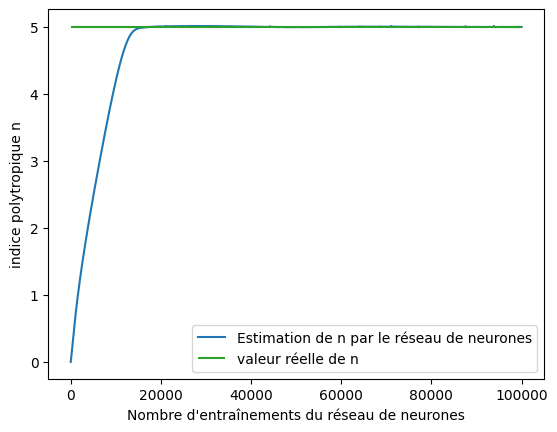

In [ ]:
plt.figure()
plt.plot(ns, label="Estimation de n par le réseau de neurones")
plt.hlines(5, 0, len(ns), color ="tab:green", label= "valeur réelle de n")
plt.xlabel("Nombre d'entraînements du réseau de neurones")
plt.ylabel("indice polytropique n")
plt.legend()
#plt.savefig("Prédiction valeur de n pour n = 5.png",dpi=300)
#files.download('Prédiction valeur de n pour n = 5.png')
plt.show()

In [ ]:
print(ns)


[0.0009999998146668077, 0.0019985921680927277, 0.002987021580338478, 0.003962064161896706, 0.004928696900606155, 0.005871244240552187, 0.00678258528932929, 0.007658992428332567, 0.008498333394527435, 0.009299340657889843, 0.010061278007924557, 0.010783783160150051, 0.011466789059340954, 0.012110495008528233, 0.0127153554931283, 0.013282088562846184, 0.013811687007546425, 0.014305430464446545, 0.014764895662665367, 0.015191960148513317, 0.015588791109621525, 0.015957830473780632, 0.016301769763231277, 0.016623523086309433, 0.016926195472478867, 0.017213040962815285, 0.017487436532974243, 0.017752837389707565, 0.01801273785531521, 0.018270626664161682, 0.018529944121837616, 0.018794026225805283, 0.01906604692339897, 0.019348960369825363, 0.019645432010293007, 0.019957777112722397, 0.02028789184987545, 0.020637206733226776, 0.021006640046834946, 0.021396582946181297, 0.02180689387023449, 0.022236932069063187, 0.02268560230731964, 0.023151425644755363, 0.023632625117897987, 0.0241272170096

In [ ]:
print(ns[-1])

4.999156951904297
